# Severe Preeclampsia Classification

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Profiling

In [2]:
# Importing Dataset
df = pd.read_csv('preeclampsia.csv')

In [3]:
# Previewing Dataset
df.head()

,id,Age,Height,Weight,Gestational Age,Gravida,Parity,Abortus,Systolic,Diastolic,Proteinuria,Delivery Method,Creatinine,Hemoglobin,Leukocytes,Hematocrit,Platelets,Erythrocytes,Prognosis
0,2215,28,158,60,7,1,0,0,142,84,1+,Nullipara,"0,48","15,1","10,28","42,8",387.0,"5,06",Moderate Preeclampsia
1,145817,40,162,NaN,31,2,1,0,165,100,0,SC,"0,49","10,2","10,32","34,4",321.0,"4,45",Moderate Preeclampsia
2,170428,27,155,81,38,3,2,0,144,101,1+,SC,"0,4","10,9","10,05","32,1",237.0,"3,75",Moderate Preeclampsia
3,170553,24,162,84,36,1,0,0,170,110,1+,Nullipara,"0,54","9,5","12,27","28,5",451.0,"3,55",Severe Preeclampsia
4,170668,27,160,62,31,1,0,0,160,90,4+,Nullipara,"0,59","9,8","13,03","29,9",332.0,"4,69",Severe Preeclampsia


In [4]:
# Dataset Information
df_types = pd.DataFrame(df.dtypes)
df_nulls = df.count()

df_null_count = pd.concat([df_types, df_nulls], axis=1)
df_null_count = df_null_count.reset_index()

# Reassign column names
col_names = ["features", "types", "non_null_counts"]
df_null_count.columns = col_names
df_null_count.to_excel("info.xlsx")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131 entries, 0 to 130
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               131 non-null    int64  
 1   Age              131 non-null    int64  
 2   Height           131 non-null    int64  
 3   Weight           129 non-null    object 
 4   Gestational Age  131 non-null    int64  
 5   Gravida          131 non-null    int64  
 6   Parity           131 non-null    int64  
 7   Abortus          131 non-null    int64  
 8   Systolic         131 non-null    int64  
 9   Diastolic        131 non-null    int64  
 10  Proteinuria      131 non-null    object 
 11  Delivery Method  131 non-null    object 
 12  Creatinine       129 non-null    object 
 13  Hemoglobin       129 non-null    object 
 14  Leukocytes       129 non-null    object 
 15  Hematocrit       129 non-null    object 
 16  Platelets        129 non-null    float64
 17  Erythrocytes    

In [5]:
# Dataset Description
df.describe()

,id,Age,Height,Gestational Age,Gravida,Parity,Abortus,Systolic,Diastolic,Platelets
count,1.310000e+02,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,129.000000
mean,7.385946e+08,31.610687,157.412214,33.145038,2.358779,1.091603,0.290076,147.824427,94.786260,290.914729
std,9.746947e+08,6.380948,8.926081,5.882336,1.137262,0.956358,0.638370,20.313119,16.334488,64.774492
min,2.215000e+03,17.000000,100.000000,7.000000,1.000000,0.000000,0.000000,100.000000,30.000000,133.000000
25%,2.019295e+05,26.000000,155.000000,31.000000,1.000000,0.000000,0.000000,131.000000,85.000000,239.000000
50%,2.305240e+05,32.000000,158.000000,35.000000,2.000000,1.000000,0.000000,148.000000,96.000000,293.000000
75%,2.013026e+09,37.000000,161.000000,37.000000,3.000000,2.000000,0.000000,164.000000,107.500000,332.000000
max,2.020015e+09,49.000000,178.000000,42.000000,5.000000,4.000000,3.000000,197.000000,128.000000,484.000000


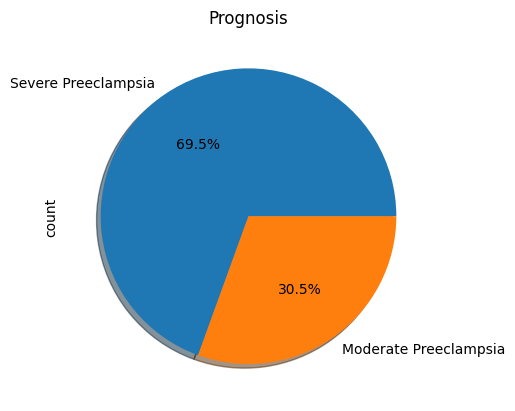

In [6]:
# Plot with pie chart
df['Prognosis'].value_counts().plot(kind='pie', autopct='%1.1f%%', shadow=True)
plt.title('Prognosis')
plt.show()

## Data Cleaning

In [7]:
# Remove ID Column
df.drop('id', axis=1, inplace=True)

In [8]:
# Checking Missing Values
df.isna().sum().to_excel('missing_values_count.xlsx')

In [9]:
df[df.isna().any(axis=1)].to_excel('missing_values.xlsx')
df[df.isna().any(axis=1)]

,Age,Height,Weight,Gestational Age,Gravida,Parity,Abortus,Systolic,Diastolic,Proteinuria,Delivery Method,Creatinine,Hemoglobin,Leukocytes,Hematocrit,Platelets,Erythrocytes,Prognosis
1,40,162,NaN,31,2,1,0,165,100,0,SC,"0,49","10,2","10,32","34,4",321.0,"4,45",Moderate Preeclampsia
21,37,162,NaN,36,3,2,0,150,100,1+,SC,"0,49","10,89","10,98","32,4",361.0,"4,52",Moderate Preeclampsia
22,31,168,78,37,2,1,0,165,100,1+,Spontaneous,NaN,NaN,NaN,NaN,NaN,NaN,Moderate Preeclampsia
90,49,155,68,28,1,0,0,175,110,1+,Nullipara,NaN,NaN,NaN,NaN,NaN,NaN,Moderate Preeclampsia


In [10]:
# Convert Weight from String to Float
df['Weight'] = df['Weight'].str.replace(',', '.').astype(float)

In [11]:
sum_weight = df['Weight'].sum()
avg_weight = sum_weight/129
print(sum_weight)
print(avg_weight)

9589.6
74.33798449612404


In [12]:

# Replace Null Values in Weight with the Mean
df['Weight'] = df['Weight'].fillna(df['Weight'].mean())

In [13]:
# Remove the remaining rows with missing values
df.dropna(inplace=True)

In [14]:
# Check if there are any remaining missing values
df.isna().sum()

Age                0
Height             0
Weight             0
Gestational Age    0
Gravida            0
Parity             0
Abortus            0
Systolic           0
Diastolic          0
Proteinuria        0
Delivery Method    0
Creatinine         0
Hemoglobin         0
Leukocytes         0
Hematocrit         0
Platelets          0
Erythrocytes       0
Prognosis          0
dtype: int64

In [15]:
df.shape

(129, 18)

In [16]:
df.head()

,Age,Height,Weight,Gestational Age,Gravida,Parity,Abortus,Systolic,Diastolic,Proteinuria,Delivery Method,Creatinine,Hemoglobin,Leukocytes,Hematocrit,Platelets,Erythrocytes,Prognosis
0,28,158,60.000000,7,1,0,0,142,84,1+,Nullipara,"0,48","15,1","10,28","42,8",387.0,"5,06",Moderate Preeclampsia
1,40,162,74.337984,31,2,1,0,165,100,0,SC,"0,49","10,2","10,32","34,4",321.0,"4,45",Moderate Preeclampsia
2,27,155,81.000000,38,3,2,0,144,101,1+,SC,"0,4","10,9","10,05","32,1",237.0,"3,75",Moderate Preeclampsia
3,24,162,84.000000,36,1,0,0,170,110,1+,Nullipara,"0,54","9,5","12,27","28,5",451.0,"3,55",Severe Preeclampsia
4,27,160,62.000000,31,1,0,0,160,90,4+,Nullipara,"0,59","9,8","13,03","29,9",332.0,"4,69",Severe Preeclampsia


## Data Transformation

In [17]:
# Convert Creatinine, Hemoglobin, Leukocytes, Hematocrit, Erythrocytes from String to Float
df['Creatinine'] = df['Creatinine'].str.replace(',', '.').astype(float)
df['Hemoglobin'] = df['Hemoglobin'].str.replace(',', '.').astype(float)
df['Leukocytes'] = df['Leukocytes'].str.replace(',', '.').astype(float)
df['Hematocrit'] = df['Hematocrit'].str.replace(',', '.').astype(float)
df['Erythrocytes'] = df['Erythrocytes'].str.replace(',', '.').astype(float)

In [18]:
# Dataset datatypes
df.dtypes

Age                  int64
Height               int64
Weight             float64
Gestational Age      int64
Gravida              int64
Parity               int64
Abortus              int64
Systolic             int64
Diastolic            int64
Proteinuria         object
Delivery Method     object
Creatinine         float64
Hemoglobin         float64
Leukocytes         float64
Hematocrit         float64
Platelets          float64
Erythrocytes       float64
Prognosis           object
dtype: object

In [19]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Proteinuria'] = le.fit_transform(df['Proteinuria'])
df['Delivery Method'] = le.fit_transform(df['Delivery Method'])
df['Prognosis'] = le.fit_transform(df['Prognosis'])

In [20]:
df.dtypes

Age                  int64
Height               int64
Weight             float64
Gestational Age      int64
Gravida              int64
Parity               int64
Abortus              int64
Systolic             int64
Diastolic            int64
Proteinuria          int32
Delivery Method      int32
Creatinine         float64
Hemoglobin         float64
Leukocytes         float64
Hematocrit         float64
Platelets          float64
Erythrocytes       float64
Prognosis            int32
dtype: object

In [21]:
# Delivery Method : Nullipara = 0, SC = 1, Spontaneous = 2
# Prognosis : Moderate Preeclamsia = 0, Severe Preeclampsia = 1
# Proteinuria : 0 = 0, 1+ = 1, 2+ = 2, 3+ = 3, 4+ = 4 
df.head()

,Age,Height,Weight,Gestational Age,Gravida,Parity,Abortus,Systolic,Diastolic,Proteinuria,Delivery Method,Creatinine,Hemoglobin,Leukocytes,Hematocrit,Platelets,Erythrocytes,Prognosis
0,28,158,60.000000,7,1,0,0,142,84,1,0,0.48,15.1,10.28,42.8,387.0,5.06,0
1,40,162,74.337984,31,2,1,0,165,100,0,1,0.49,10.2,10.32,34.4,321.0,4.45,0
2,27,155,81.000000,38,3,2,0,144,101,1,1,0.40,10.9,10.05,32.1,237.0,3.75,0
3,24,162,84.000000,36,1,0,0,170,110,1,0,0.54,9.5,12.27,28.5,451.0,3.55,1
4,27,160,62.000000,31,1,0,0,160,90,4,0,0.59,9.8,13.03,29.9,332.0,4.69,1


In [22]:
df.to_excel('cleaned_dataset.xlsx')

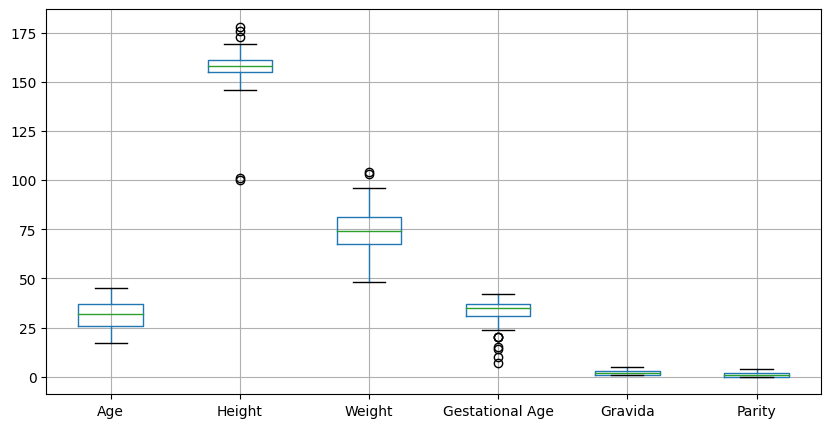

In [23]:
# Check if there are any outliers in the dataset with boxplots
df[['Age', 'Height', 'Weight', 'Gestational Age', 'Gravida', 'Parity']].boxplot()
# Change plot size in inches
fig = plt.gcf()
fig.set_size_inches(10, 5)
plt.show()

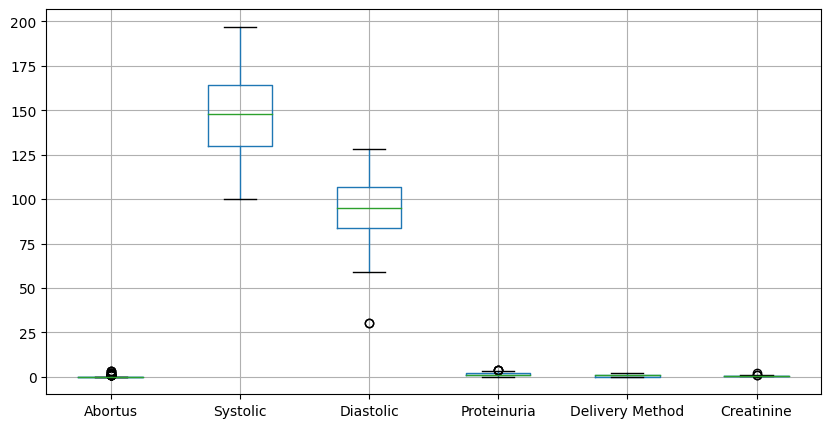

In [24]:
df[[ 'Abortus','Systolic', 'Diastolic', 'Proteinuria', 'Delivery Method', 'Creatinine']].boxplot()
fig = plt.gcf()
fig.set_size_inches(10, 5)
plt.show()

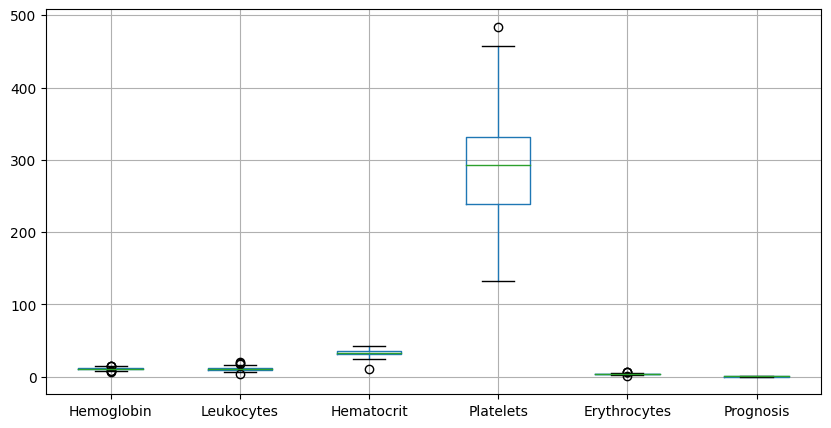

In [25]:
df[['Hemoglobin','Leukocytes','Hematocrit', 'Platelets', 'Erythrocytes', 'Prognosis']].boxplot()
fig = plt.gcf()
fig.set_size_inches(10, 5)
plt.show()

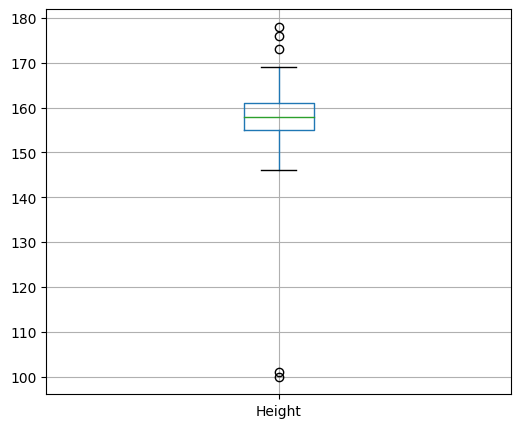

In [26]:
df[['Height']].boxplot()
fig = plt.gcf()
fig.set_size_inches(6, 5)
plt.show()

In [27]:
# Get Height IQR3
Q1 = df['Height'].quantile(0.25,interpolation="midpoint")
Q3 = df['Height'].quantile(0.75,interpolation="midpoint")
IQR = Q3 - Q1
lower_outlier_threshold = Q1 - 1.5 * IQR
upper_outlier_threshold = Q3 + 1.5 * IQR
print("Height Q1:",Q1)
print("Height Q3:",Q3)
print("Height IQR:",IQR)
print("Height Lower Outlier Threshold:",lower_outlier_threshold)
print("Height Upper Outlier Threshold:",upper_outlier_threshold)

Height Q1: 155.0
Height Q3: 161.0
Height IQR: 6.0
Height Lower Outlier Threshold: 146.0
Height Upper Outlier Threshold: 170.0


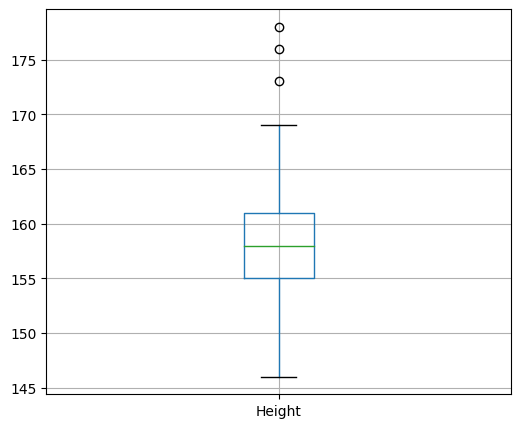

In [28]:
# Replace Outliers for Height with Mean
df['Height'] = np.where(df['Height'] < lower_outlier_threshold, df['Height'].mean(), df['Height'])

df[['Height']].boxplot()
fig = plt.gcf()
fig.set_size_inches(6, 5)
plt.show()

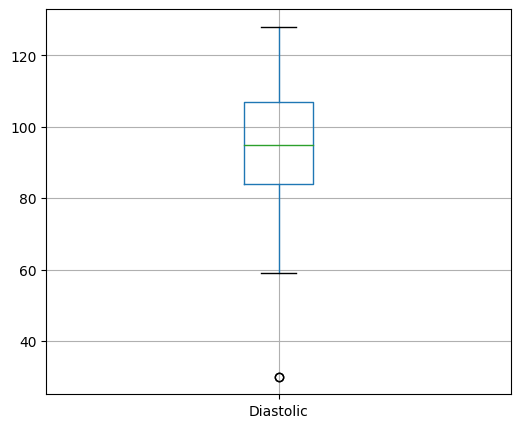

In [29]:
df[['Diastolic']].boxplot()
fig = plt.gcf()
fig.set_size_inches(6, 5)
plt.show()

In [30]:
# Get Diastolic IQR
Q1 = df['Diastolic'].quantile(0.25,interpolation="midpoint")
Q3 = df['Diastolic'].quantile(0.75,interpolation="midpoint")
IQR = Q3 - Q1
lower_outlier_threshold = Q1 - 1.5 * IQR
upper_outlier_threshold = Q3 + 1.5 * IQR
print("Diastolic Q1:",Q1)
print("Diastolic Q3:",Q3)
print("Diastolic IQR:",IQR)
print("Diastolic Lower Outlier Threshold:",lower_outlier_threshold)
print("Diastolic Upper Outlier Threshold:",upper_outlier_threshold)

Diastolic Q1: 84.0
Diastolic Q3: 107.0
Diastolic IQR: 23.0
Diastolic Lower Outlier Threshold: 49.5
Diastolic Upper Outlier Threshold: 141.5


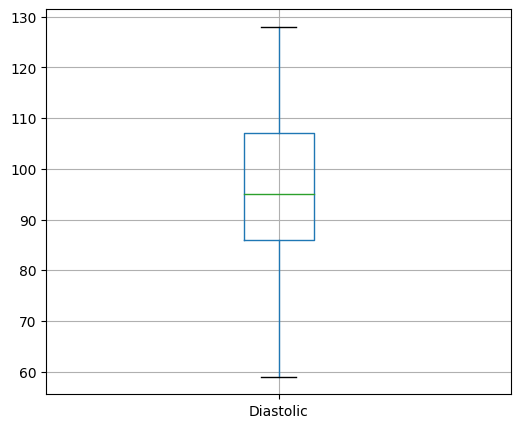

In [31]:
# Replace Outliers for Diastolic with Mean
df['Diastolic'] = np.where(df['Diastolic'] < lower_outlier_threshold, df['Diastolic'].mean(), df['Diastolic'])

df[['Diastolic']].boxplot()
fig = plt.gcf()
fig.set_size_inches(6, 5)
plt.show()

In [32]:
# Concat Height & Weight as Body Mass Index
df['BMI'] =  df['Weight'] / ((df['Height'] / 100)**2)
# Drop Height & Body Weight
df.drop(['Height', 'Weight'], axis=1, inplace=True)
# Move BMI to Index number 1
df.insert(1, 'BMI', df.pop('BMI'))
df.head()

,Age,BMI,Gestational Age,Gravida,Parity,Abortus,Systolic,Diastolic,Proteinuria,Delivery Method,Creatinine,Hemoglobin,Leukocytes,Hematocrit,Platelets,Erythrocytes,Prognosis
0,28,24.034610,7,1,0,0,142,84.0,1,0,0.48,15.1,10.28,42.8,387.0,5.06,0
1,40,28.325707,31,2,1,0,165,100.0,0,1,0.49,10.2,10.32,34.4,321.0,4.45,0
2,27,33.714880,38,3,2,0,144,101.0,1,1,0.40,10.9,10.05,32.1,237.0,3.75,0
3,24,32.007316,36,1,0,0,170,110.0,1,0,0.54,9.5,12.27,28.5,451.0,3.55,1
4,27,24.218750,31,1,0,0,160,90.0,4,0,0.59,9.8,13.03,29.9,332.0,4.69,1


In [33]:
df.dtypes
pd.DataFrame(df.dtypes, columns=['dtypes']).to_excel('data_types_cleaned_dataset.xlsx')

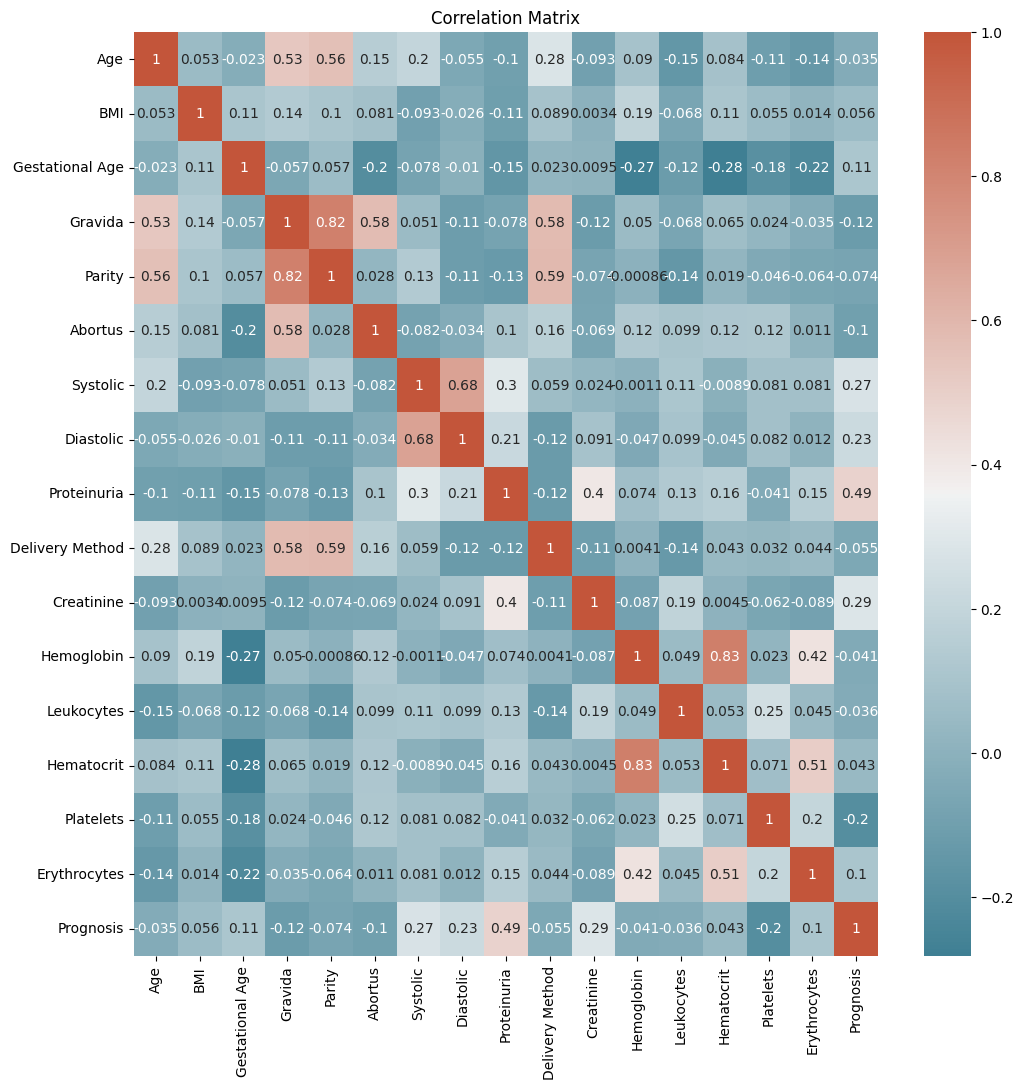

In [34]:
# Dataset correlation with sns heatmap
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))
plt.title('Correlation Matrix')
fig = plt.gcf()
fig.set_size_inches(12, 12)
plt.show()

## Data Modeling

### Data  Split

In [35]:
y = df.Prognosis
X = df.drop(columns='Prognosis')
X.shape

(129, 16)

In [36]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)
# X_test.shape, X_train.shape, y_train.shape, y_test.shape

### Decision Tree

In [37]:
# Find the best Decision Tree model accuracy with KFold Cross Validation
from sklearn.model_selection import cross_val_predict
from sklearn.tree import DecisionTreeClassifier
k = 5
DT = DecisionTreeClassifier(random_state=42,criterion='entropy')
DT_pred  = cross_val_predict(DT, X, y, cv=k, method='predict')
DT_pred.shape


(129,)

In [38]:
# Evaluate Accuracy
from sklearn.model_selection import cross_val_score
DT_avg_accuracy = cross_val_score(DT, X, y, cv=k).mean()
print(f"{k}-Fold CV Average Scores = %.2f" % DT_avg_accuracy)

5-Fold CV Average Scores = 0.74


In [39]:
# DT = DecisionTreeClassifier(random_state=42)
# DT.fit(X_train, y_train)

# DT_pred = DT.predict(X_test)

In [40]:
# DT.score(X_train, y_train), DT.score(X_test, y_test)

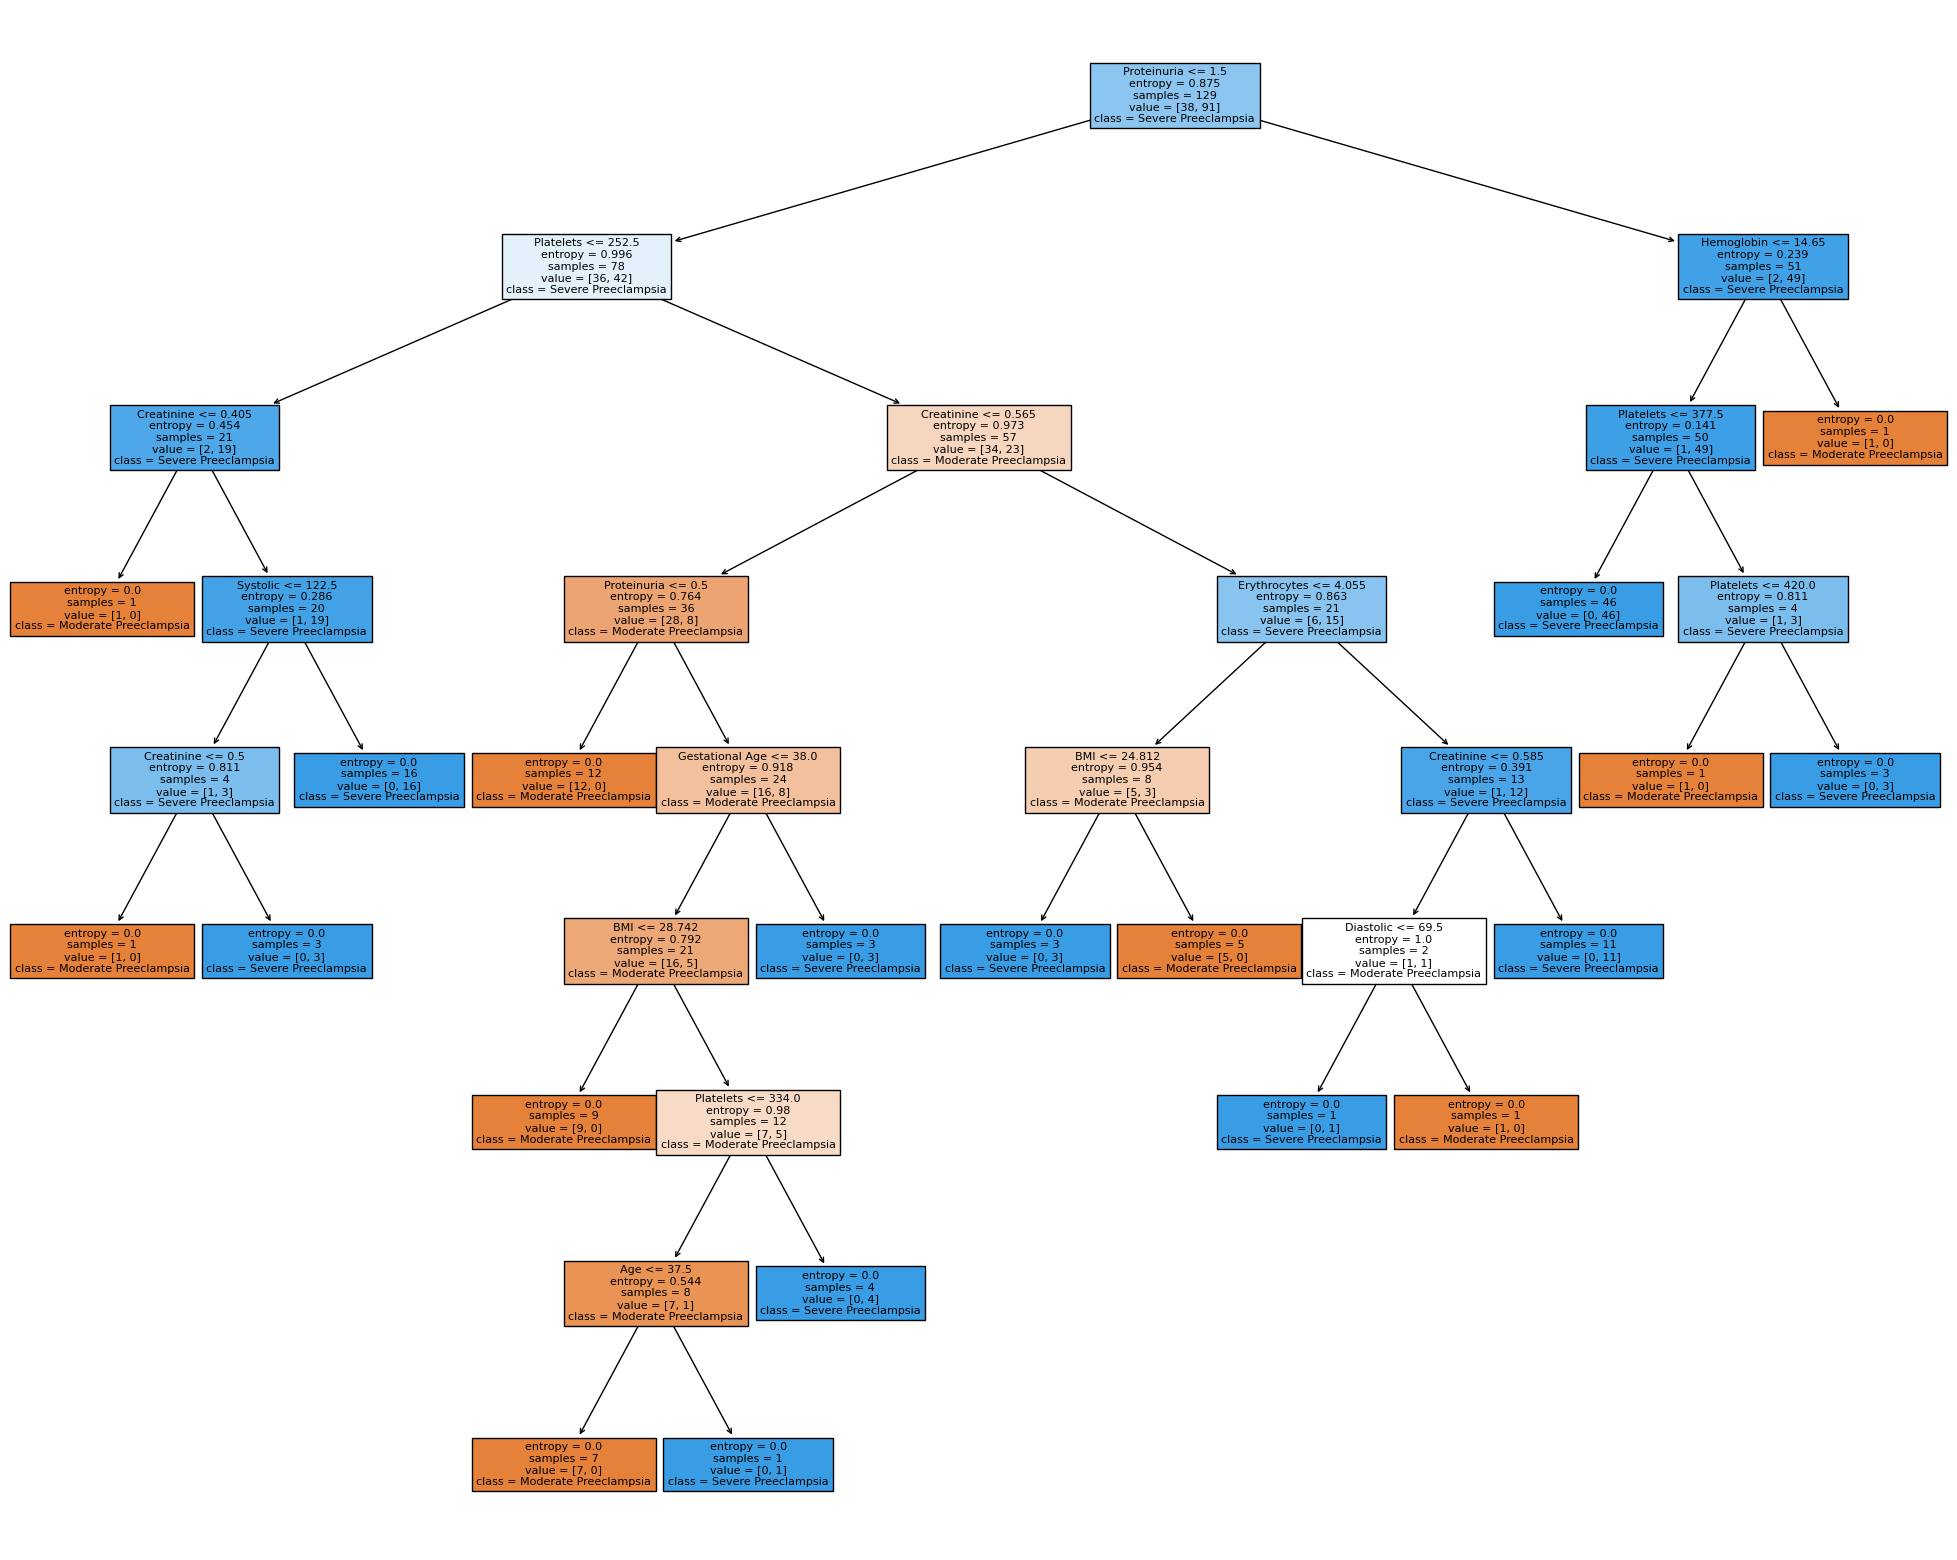

In [41]:
# Visualize Decision Tree
from sklearn import tree
DT.fit(X, y)
fig = plt.figure(figsize=(25, 20))
tree.plot_tree(DT, feature_names=X.columns, class_names=['Moderate Preeclampsia', 'Severe Preeclampsia'], filled=True,)
plt.show()

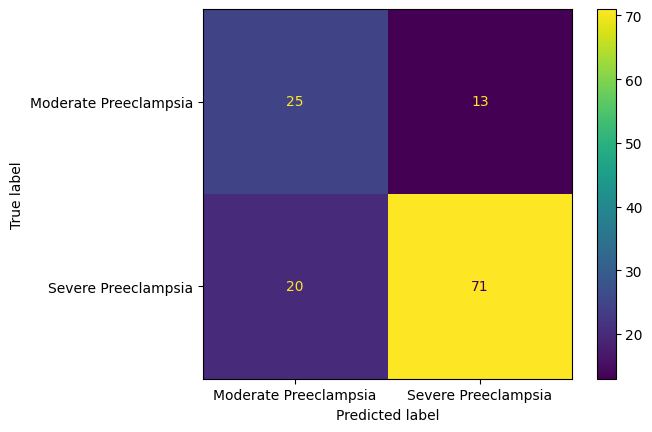

In [42]:
# Plot Confusion Matrix with Heatmap
from sklearn import metrics

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=metrics.confusion_matrix(y, DT_pred), display_labels = ["Moderate Preeclampsia", "Severe Preeclampsia"])
cm_display.plot()
pd.DataFrame(metrics.confusion_matrix(y, DT_pred)).to_excel('decision_tree_confusion_matrix.xlsx')

In [43]:
# Evaluate with classification report
print(metrics.classification_report(y, DT_pred))
pd.DataFrame(metrics.classification_report(y, DT_pred, output_dict=True)).to_excel('decision_tree_classification_report.xlsx')

              precision    recall  f1-score   support

           0       0.56      0.66      0.60        38
           1       0.85      0.78      0.81        91

    accuracy                           0.74       129
   macro avg       0.70      0.72      0.71       129
weighted avg       0.76      0.74      0.75       129



[0.         0.34210526 1.        ]
[0.         0.78021978 1.        ]
0.7190572585309428


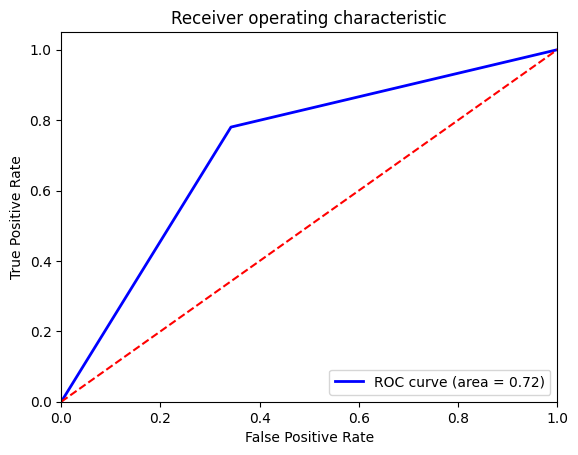

In [44]:
# ROC Curve
DT_prob = cross_val_predict(DT, X, y, cv=k, method='predict_proba')[:, 1]
fpr, tpr, thresholds = metrics.roc_curve(y, DT_prob)
roc_auc = metrics.auc(fpr, tpr)

print(fpr)
print(tpr)
print(roc_auc)

plt.figure()
plt.plot(fpr, tpr,'b-', label='ROC curve (area = %0.2f)' % roc_auc, linewidth=2)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

### Naive Bayes

In [45]:
# Find the best Naive Bayes model accuracy with KFold Cross Validation
from sklearn.model_selection import cross_val_predict
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()
GNB_pred  = cross_val_predict(GNB, X, y, cv=k, method='predict')

In [46]:
# Evaluate Accuracy
GNB_avg_accuracy = cross_val_score(GNB, X, y, cv=k).mean()
print(f"{k}-Fold CV Average Scores = %.2f" % GNB_avg_accuracy)

5-Fold CV Average Scores = 0.74


In [47]:
# GNB = GaussianNB()
# GNB.fit(X_train, y_train)

# GNB_pred = GNB.predict(X_test)

In [48]:
# GNB.score(X_train, y_train), GNB.score(X_test, y_test)

In [49]:
# Dapatkan probabilitas prediksi untuk setiap fitur
GNB.fit(X, y)
probabilitas_fitur = GNB.predict_proba(X)

In [50]:
# Buat DataFrame dari probabilitas
df_probabilitas = pd.DataFrame(probabilitas_fitur, columns=GNB.classes_,index=X.index)

# convert to percentage
df_probabilitas = df_probabilitas.mul(100).round(2)

# concatenate with X_test
df_probabilitas = pd.concat([X, df_probabilitas], axis=1)

# add y_pred
df_probabilitas['Predicted'] = GNB_pred

# export to excel
df_probabilitas.to_excel('naive_bayes_probabilitas.xlsx')


In [51]:
df_probabilitas

,Age,BMI,Gestational Age,Gravida,Parity,Abortus,Systolic,Diastolic,Proteinuria,Delivery Method,Creatinine,Hemoglobin,Leukocytes,Hematocrit,Platelets,Erythrocytes,0,1,Predicted
0,28,24.034610,7,1,0,0,142,84.0,1,0,0.48,15.1,10.28,42.8,387.0,5.06,96.05,3.95,1
1,40,28.325707,31,2,1,0,165,100.0,0,1,0.49,10.2,10.32,34.4,321.0,4.45,65.94,34.06,1
2,27,33.714880,38,3,2,0,144,101.0,1,1,0.40,10.9,10.05,32.1,237.0,3.75,27.34,72.66,1
3,24,32.007316,36,1,0,0,170,110.0,1,0,0.54,9.5,12.27,28.5,451.0,3.55,3.94,96.06,1
4,27,24.218750,31,1,0,0,160,90.0,4,0,0.59,9.8,13.03,29.9,332.0,4.69,0.00,100.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,42,26.533759,24,2,1,0,176,103.0,2,1,0.55,12.3,11.40,33.5,196.0,3.84,0.48,99.52,1
127,44,36.212279,25,4,3,0,174,105.0,1,2,0.59,11.0,11.36,32.6,407.0,4.32,5.19,94.81,1
128,34,27.815882,24,3,1,1,150,100.0,0,1,0.50,10.0,19.27,28.5,323.0,3.40,98.69,1.31,0
129,33,20.545694,24,3,2,0,170,120.0,1,1,0.48,10.6,10.67,29.8,322.0,4.12,66.49,33.51,0


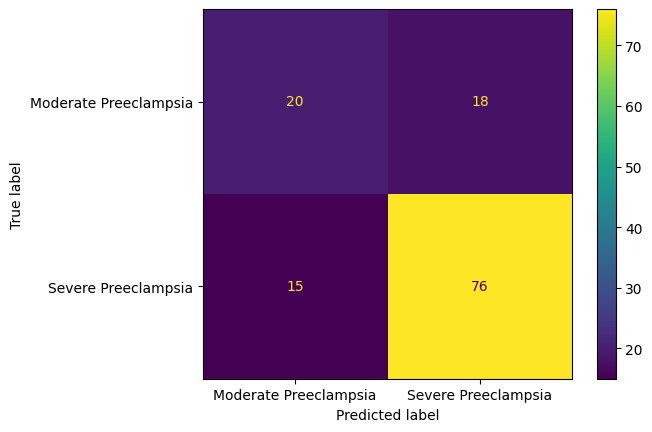

In [52]:
# Plot Confusion Matrix with Heatmap
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=metrics.confusion_matrix(y, GNB_pred), display_labels = ["Moderate Preeclampsia", "Severe Preeclampsia"])
cm_display.plot()
pd.DataFrame(metrics.confusion_matrix(y, GNB_pred)).to_excel('naive_bayes_confusion_matrix.xlsx')

In [53]:
# Evaluate with classification report
print(metrics.classification_report(y, GNB_pred))
pd.DataFrame(metrics.classification_report(y, GNB_pred, output_dict=True)).to_excel('naive_bayes_classification_report.xlsx')

              precision    recall  f1-score   support

           0       0.57      0.53      0.55        38
           1       0.81      0.84      0.82        91

    accuracy                           0.74       129
   macro avg       0.69      0.68      0.68       129
weighted avg       0.74      0.74      0.74       129



0.3587540279269602
0.6591163938102713


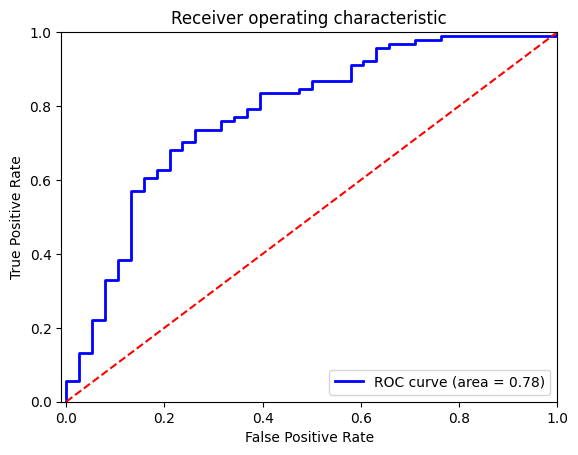

In [54]:
# ROC Curve
GNB_prob = cross_val_predict(GNB, X, y, cv=k, method='predict_proba')[:, 1]
fpr, tpr, thresholds = metrics.roc_curve(y, GNB_prob)
roc_auc = metrics.auc(fpr, tpr)
print(fpr.mean())
print(tpr.mean())

plt.figure()
plt.plot(fpr, tpr,'b-', label='ROC curve (area = %0.2f)' % roc_auc, linewidth=2)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.axis([-0.01,1,0,1])
plt.show()

In [55]:
# Export Naive Bayes Model
import joblib
joblib.dump(GNB, 'naive_bayes_model.joblib')

['naive_bayes_model.joblib']